In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [26]:
population = pd.read_csv('population.csv')
sample = population[population['Pills per Person per Day'] > 0.2]
sample = sample[sample['AGI per Return'] > 4e4]

In [27]:
stats.ttest_1samp(sample['Death Rate'], population['Death Rate'].mean())

Ttest_1sampResult(statistic=2.8079369811662818, pvalue=0.00681537403956309)

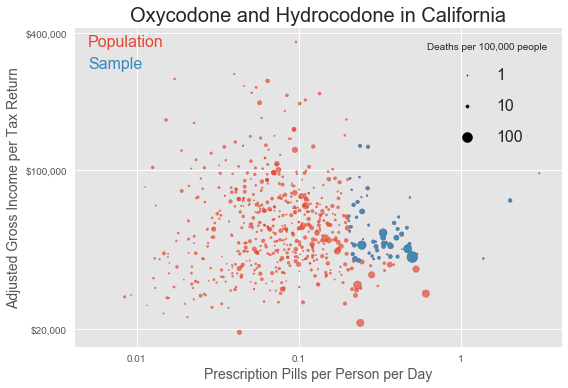

In [71]:
p = population
s = sample

plt.style.use('ggplot')
plt.scatter(
    p['Pills per Person per Day'],
    p['AGI per Return'],
    s = p['Death Rate'],
    alpha=0.7
)
plt.scatter(
    s['Pills per Person per Day'],
    s['AGI per Return'],
    s = s['Death Rate'],
    alpha=0.9
)
for area in [1, 10, 100]:
    plt.scatter([], [], c='k', s=area, label=str(area))
plt.xscale('log')
plt.yscale('log')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Deaths per 100,000 people', fontsize=16)

plt.xticks([0.01, 0.1, 1], ['0.01', '0.1', '1'])
plt.yticks([2e4, 1e5, 4e5], ['$20,000', '$100,000', '$400,000'])

#plt.text(4, 2e4, '$p = 0.007$', horizontalalignment='right', size=24)
plt.text(0.005, 3.5e5, 'Population', horizontalalignment='left', size=16, c='C0')
plt.text(0.005, 2.8e5, 'Sample', horizontalalignment='left', size=16, c='C1')

plt.title('Oxycodone and Hydrocodone in California', size=20)
plt.xlabel('Prescription Pills per Person per Day', size=14)
plt.ylabel('Adjusted Gross Income per Tax Return', size=14)
plt.tight_layout()
plt.savefig('scatter-log-scale.png', dpi=300)